In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(columns=['Serial No.'],inplace=True)

In [5]:
df.shape

(400, 8)

In [6]:
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=df.iloc[:,:-1]

In [10]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [11]:
y=df.iloc[:,-1]

In [12]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)

In [14]:
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)

In [15]:
xtrain_scaled

array([[0.58      , 0.64285714, 0.5       , ..., 0.625     , 0.71794872,
        0.        ],
       [0.52      , 0.64285714, 0.5       , ..., 0.875     , 0.63461538,
        1.        ],
       [0.8       , 0.82142857, 1.        , ..., 0.5       , 0.81410256,
        1.        ],
       ...,
       [0.48      , 0.53571429, 0.25      , ..., 0.75      , 0.47115385,
        0.        ],
       [0.68      , 0.64285714, 0.75      , ..., 0.75      , 0.75320513,
        1.        ],
       [0.8       , 0.78571429, 0.75      , ..., 0.5       , 0.75961538,
        1.        ]])

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [17]:
model=Sequential()

In [18]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics='accuracy')

In [20]:
history=model.fit(xtrain_scaled,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100


e:\newpy\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


7/7 [==============================] - 1s 27ms/step - loss: 0.8972 - accuracy: 0.0000e+00 - val_loss: 0.8817 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7851 - accuracy: 0.0000e+00 - val_loss: 0.7673 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.0000e+00 - val_loss: 0.6594 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5851 - accuracy: 0.0000e+00 - val_loss: 0.5521 - val_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.0000e+00 - val_loss: 0.4506 - val_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4068 - accuracy: 0.0000e+00 - val_loss: 0.3606 - val_accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3294 - accuracy: 0.0000e+00 - val_loss: 0.2815 - val_acc

In [21]:
y_pred=model.predict(xtest_scaled)

4/4 [==============================] - 0s 4ms/step


In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(ytest,y_pred)

0.6740356065549896

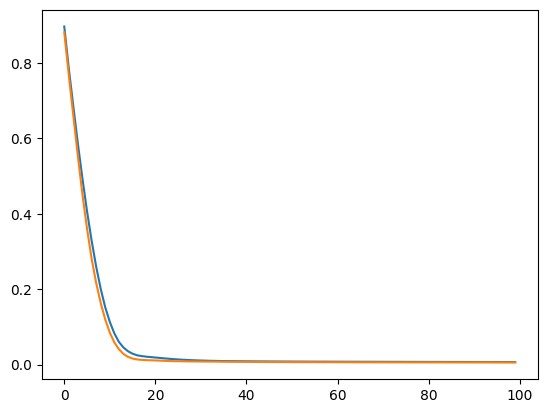

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])